# Project "EDA"
## Goals

1. Сформулировать предположения и гипотезы для дальнейшего построения модели.
2. Проверить качество данных и очистить их при необходимости.
3. Определиться с параметрами модели.


In [92]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
from collections import Counter

%matplotlib inline
warnings.simplefilter('ignore')

In [93]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [94]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В текущем датасете содержатся записи данных 395 студентов. Структура датасета - 30 столбцов, из которых 13 числовых и 17 строковых. Легко заметить, что только в первых 3 параметрах присутсвуют все значения, в остальных же наблюдаются пропуски. Отметим, что пропущенных значений не больше 50. В ходе работы проверим, можно ли их заполнить альтернативными значениями. 

## Data Preprocessing

In [95]:
stud_math.rename(columns={'studytime, granular': 'granular'}, inplace=True)


def IQR_func(x):
    perc25 = x.quantile(0.25)
    perc75 = x.quantile(0.75)
    IQR = perc75 - perc25
    y = print('25-th quantile: {},'.format(perc25),
              '75-th quantile: {},'.format(perc75),
              "IQR: {}, ".format(IQR),
              "Outlier borders: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    return y


def get_boxplot(col):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, col].isin(
                    stud_math.loc[:, col].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + col)
    plt.show()


def get_stat_dif(col):
    cols = stud_math.loc[:, col].value_counts().index[:10]
    combinations_all = list(combinations(
        stud_math.loc[:, col].dropna(axis=0).unique(), 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, col] == comb[0], 'score'].dropna(axis=0),
                     stud_math.loc[stud_math.loc[:, col] == comb[1], 'score'].dropna(axis=0)).pvalue \
                <= 0.05/len(combinations_all):
            print('Found statistically significant differences for the column', col)
            break

Напишем также универсальную функцию, которая покажет распределение признаков, посчитает процент пропусков и выдаст выбросы для столбцов, у которых определены значения (по условиям датасета).


In [96]:
def initial_inspection(col, boundaries=None):
    print("Column:", col)
    print("Parameter distribution:")
    fig, ax = plt.subplots()
    if stud_math.loc[:, col].dtypes == np.dtype('O'):
        sns.countplot(stud_math.loc[:, col], ax=ax)
        plt.show()
    else:
        stud_math.loc[:, col].hist(ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('count')
        plt.show()
        if boundaries is not None:
            if stud_math.loc[(~stud_math.loc[:, col].between(boundaries[0], boundaries[1])) &
                             pd.notnull(stud_math.loc[:, col])].shape[0] > 0:
                print('Outliers found:')
                display(stud_math.loc[(~stud_math.loc[:, col].between(boundaries[0], boundaries[1])) &
                                      pd.notnull(stud_math.loc[:, col])])
    print('Percentage of missing data:', str(
        round(100 - stud_math.loc[:, col].count()/stud_math.shape[0]*100, 2)) + '%')
    print()

# Primary Data Analysis

В самом начале смотрим на целевую переменную score и видим, что в этом столбце есть 6 пропусков. В целевой переменной пропуски недопустимы, так как на этих данных мы в дальнейшем планируем обучать модель, а она может обучаться только на непустых значениях. Также метка целевой переменной не может быть заполнена мерой центральной тенденции, как и любым другим способом, кроме прогноза самой модели.  Удаляем их.

In [115]:
stud_math.score.isna().value_counts()

False    389
Name: score, dtype: int64

In [114]:
stud_math = stud_math.dropna(subset=['score'], axis=0)

### Column 1 - school

Column: school
Parameter distribution:


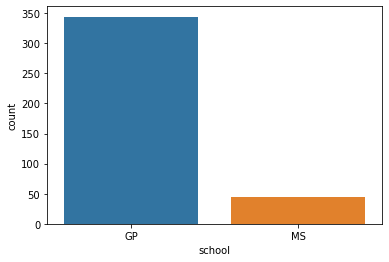

Percentage of missing data: 0.0%



In [116]:
initial_inspection('school')

### Column 2 - sex

Column: sex
Parameter distribution:


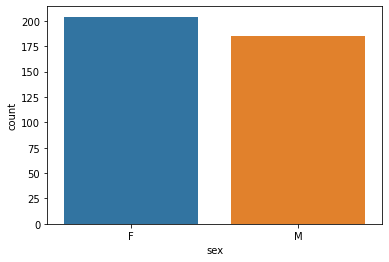

Percentage of missing data: 0.0%



In [117]:
initial_inspection('sex')

В первых двух колонках всё просто - номинативные значения, при этом нет пропусков. 

### Column 3 - age

Column: age
Parameter distribution:


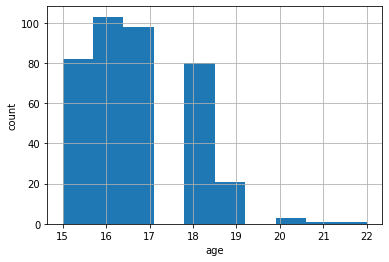

Percentage of missing data: 0.0%



In [118]:
initial_inspection('age', boundaries=(15, 22))

Значения по возрасту 20, 21, 22 года визуально выбиваются из общего порядка значений. Оставляем их, так как в предисловии к проекту сказано, что анализируется контрольная группа с 15 по 22 лет. 

### Column 4 - address

Column: address
Parameter distribution:


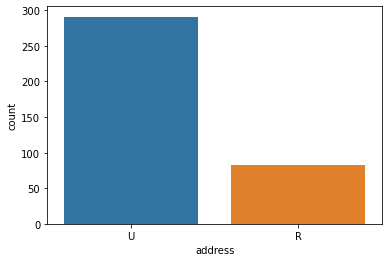

Percentage of missing data: 3.86%



In [119]:
initial_inspection('address')

### Column 5 - famsize

Column: famsize
Parameter distribution:


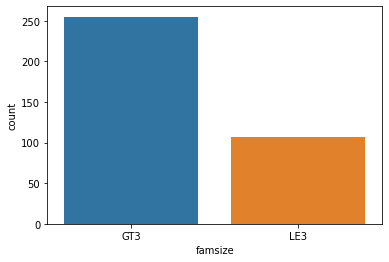

Percentage of missing data: 6.94%



In [120]:
initial_inspection('famsize')

### Cloumn 6 - Pstatus

Column: Pstatus
Parameter distribution:


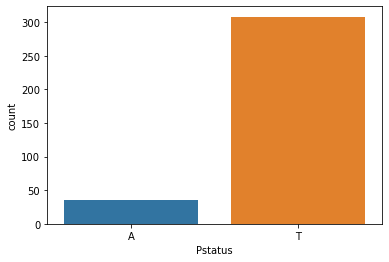

Percentage of missing data: 11.57%



In [121]:
initial_inspection('Pstatus')

После анализа колонок 4,5,6 делаем вывод, что в них есть пропущенные значения.

### Cloumn 7 - Medu

Column: Medu
Parameter distribution:


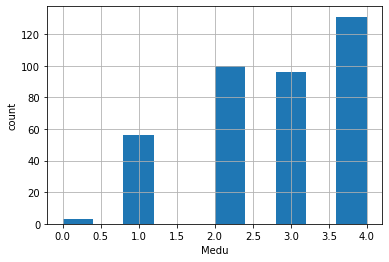

Percentage of missing data: 0.77%



In [122]:
initial_inspection('Medu', boundaries=(0, 4))

В колонке Medu отражен уровень образования матерей в шкале целых значений от 0 до 4. Выбросов нет. 

### Column 8 - Fedu

Column: Fedu
Parameter distribution:


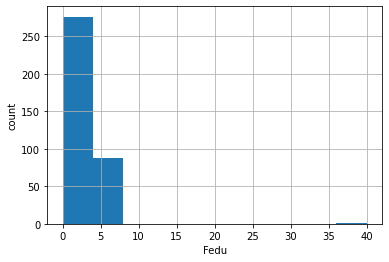

Outliers found:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


Percentage of missing data: 6.17%



In [123]:
initial_inspection('Fedu', boundaries=(0, 4))

In [124]:
stud_math.Fedu[(stud_math.Fedu > 4)] = round(stud_math.Fedu.median(), 0)
stud_math.Fedu.describe()

count    365.000000
mean       2.526027
std        1.085624
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

В колонке Fedu отражен уровень образования отцов в шкале целых значений от 0 до 4. Есть 1 выброс. Заменяем его на медиану.

### Column 9 - Mjob

Column: Mjob
Parameter distribution:


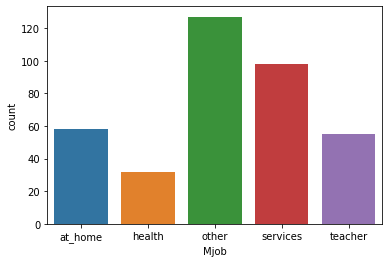

Percentage of missing data: 4.88%



In [125]:
initial_inspection('Mjob')

### Column 10 - Fjob

Column: Fjob
Parameter distribution:


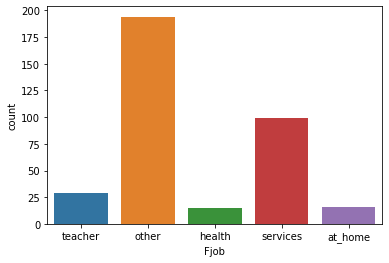

Percentage of missing data: 9.25%



In [126]:
initial_inspection('Fjob')

### Column 11 - reason

Column: reason
Parameter distribution:


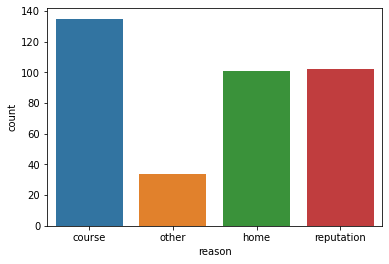

Percentage of missing data: 4.37%



In [127]:
initial_inspection('reason')

### Column 12 - guardian 

Column: guardian
Parameter distribution:


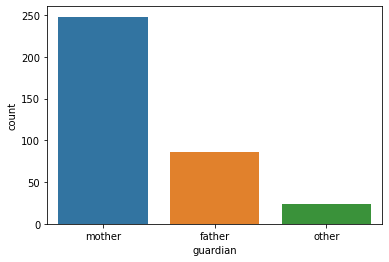

Percentage of missing data: 7.97%



In [128]:
initial_inspection('guardian')

В колонках с 9 по 12 расположены номинативные значения. Есть пропущеннные значения. 

### Column 13 - traveltime

Column: traveltime
Parameter distribution:


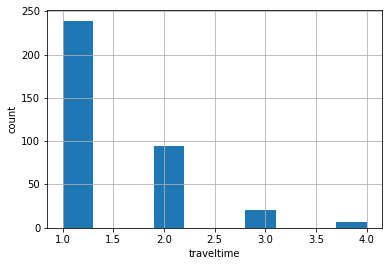

Percentage of missing data: 7.2%



In [129]:
initial_inspection('traveltime', boundaries=(1, 4))

### Column 14 - studytime

Column: studytime
Parameter distribution:


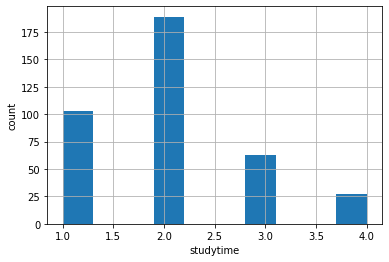

Percentage of missing data: 1.8%



In [130]:
initial_inspection('studytime', boundaries=(1, 4))

В 13 и 14 столбцах указаны значения по целой шкале от 1 до 4. Выбросов нет. 

### Column 15 - failures

Column: failures
Parameter distribution:


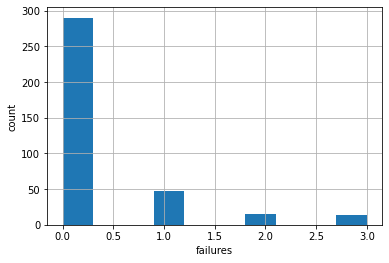

Percentage of missing data: 5.66%



In [131]:
initial_inspection('failures', boundaries=(0, 4))

### Column 16 - schoolsup

Column: schoolsup
Parameter distribution:


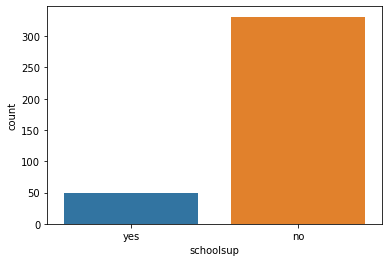

Percentage of missing data: 2.31%



In [132]:
initial_inspection('schoolsup')

### Column 17 - famsup

Column: famsup
Parameter distribution:


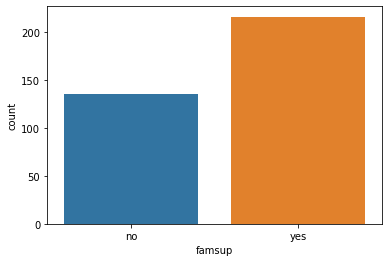

Percentage of missing data: 9.77%



In [133]:
initial_inspection('famsup')

### Column 18 - paid

Column: paid
Parameter distribution:


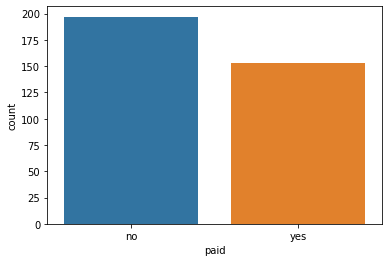

Percentage of missing data: 10.03%



In [134]:
initial_inspection('paid')

### Column 19 - activities

Column: activities
Parameter distribution:


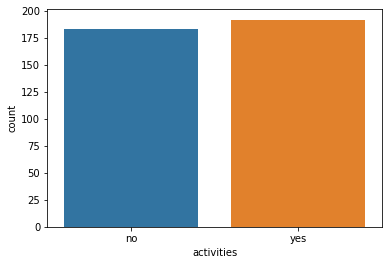

Percentage of missing data: 3.6%



In [135]:
initial_inspection('activities')

### Column 20 - nursery

Column: nursery
Parameter distribution:


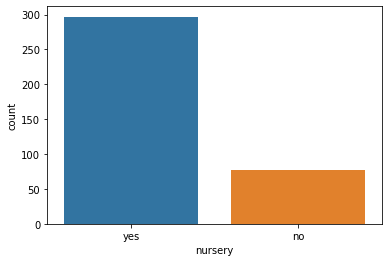

Percentage of missing data: 3.86%



In [136]:
initial_inspection('nursery')

В столбцах с 16 по 20 расположены номинативные значения. Есть пропущенные значения.

### Column 21 - granular

Column: granular
Parameter distribution:


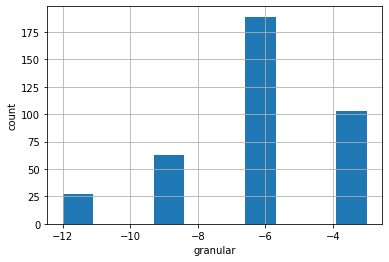

Percentage of missing data: 1.8%



In [137]:
initial_inspection('granular')

### Coumn 22 - higher

Column: higher
Parameter distribution:


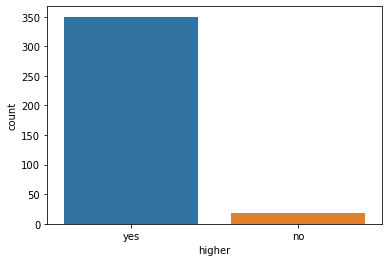

Percentage of missing data: 5.14%



In [138]:
initial_inspection('higher')

### Column 23 - internet

Column: internet
Parameter distribution:


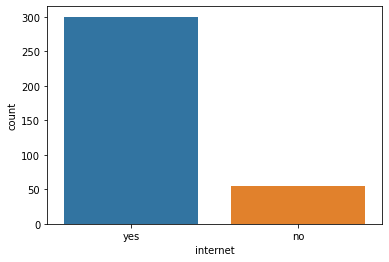

Percentage of missing data: 8.74%



In [139]:
initial_inspection('internet')

### Column 24 - romantic

Column: romantic
Parameter distribution:


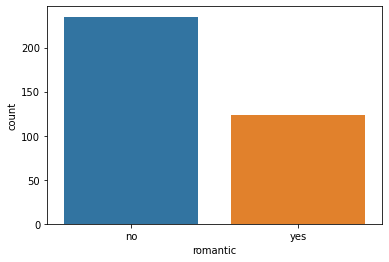

Percentage of missing data: 7.97%



In [140]:
initial_inspection('romantic')

### Column 25 - famrel 

Column: famrel
Parameter distribution:


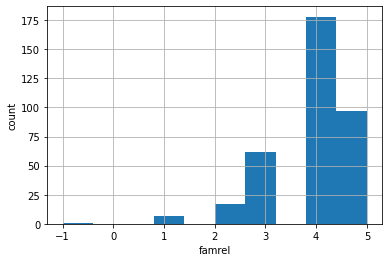

Outliers found:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


Percentage of missing data: 6.94%



In [141]:
initial_inspection('famrel', boundaries=(1, 5))

In [142]:
stud_math.famrel[(stud_math.famrel < 1)] = round(stud_math.famrel.median(), 0)
stud_math.famrel.describe()

count    362.000000
mean       3.944751
std        0.894574
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

В столбце 25 есть 1 выброс. Заменяеем его на медиану, так как семейные отношения оцениваются по целой шкале от 1 до 5.

### Column 26 - freetime

Column: freetime
Parameter distribution:


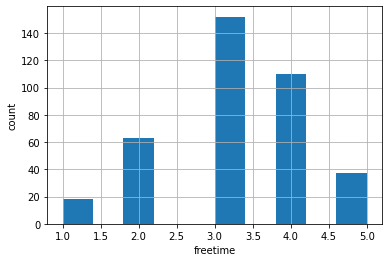

Percentage of missing data: 2.31%



In [143]:
initial_inspection('freetime', boundaries=(1, 5))

### Column 27 - goout

Column: goout
Parameter distribution:


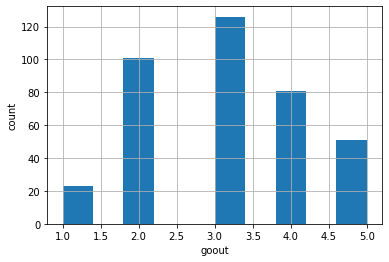

Percentage of missing data: 1.8%



In [144]:
initial_inspection('goout', boundaries=(1, 5))

### Column 28 - health

Column: health
Parameter distribution:


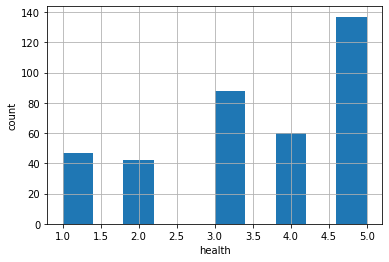

Percentage of missing data: 3.86%



In [145]:
initial_inspection('health', boundaries=(1, 5))

В столбцах 26,27,28 нет выбросов, при этом есть пропущенные значения. 

### Column 29 - absences

Column: absences
Parameter distribution:


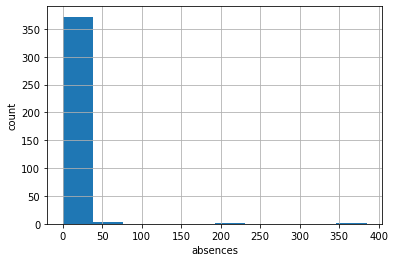

Outliers found:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0
307,GP,M,19,U,GT3,NaN,4.0,4.0,teacher,services,reputation,other,2.0,1.0,1.0,no,yes,yes,no,yes,-3.0,yes,yes,yes,4.0,3.0,4.0,4.0,38.0,40.0
315,GP,F,19,R,GT3,T,2.0,3.0,other,other,reputation,other,1.0,3.0,1.0,no,no,no,no,yes,-9.0,yes,yes,yes,4.0,1.0,2.0,3.0,40.0,55.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


Percentage of missing data: 2.83%



In [146]:
initial_inspection('absences', boundaries=(0, 30))

25-th quantile: 0.0, 75-th quantile: 8.0, IQR: 8.0,  Outlier borders: [-12.0, 20.0].


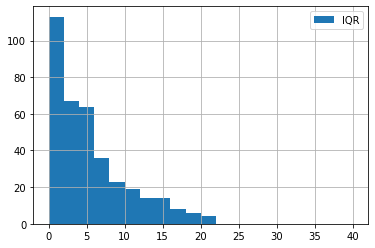

In [149]:
IQR_func(stud_math.absences)

perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
IQR = perc75 - perc25

stud_math.absences.loc[stud_math.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=20, range=(0, 40), label='IQR')

plt.legend()

In [150]:
stud_math.absences[(stud_math.absences > 30)] = round(
    stud_math.absences.median(), 0)
stud_math.absences.describe()

count    378.000000
mean       5.119048
std        5.831780
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       30.000000
Name: absences, dtype: float64

В столбце 29 есть выбросы. Используя метод IQR определили границы выбросов (-12,20). Корректируем нижний предел на 0 (так как сам признак задаётся положительными значениями) и верхний предел на 30 (так как значения до 30 выглядят вполне реальными). Фильтруем данные и меняем показатели > 30 на медиану.

### Column 30 -  score

Column: score
Parameter distribution:


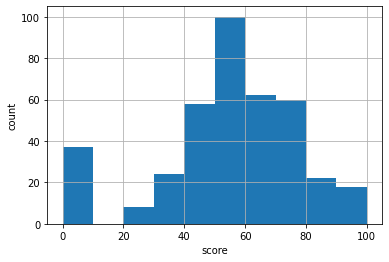

Percentage of missing data: 0.0%



In [151]:
initial_inspection('score', boundaries=(0, 100))

Так как оценка за экзамен выставляется по стобальной шкале, приходим к выводу, что в столбце 30 выбросов нет, но есть пропущенные значения. 

# Correlation Analysis

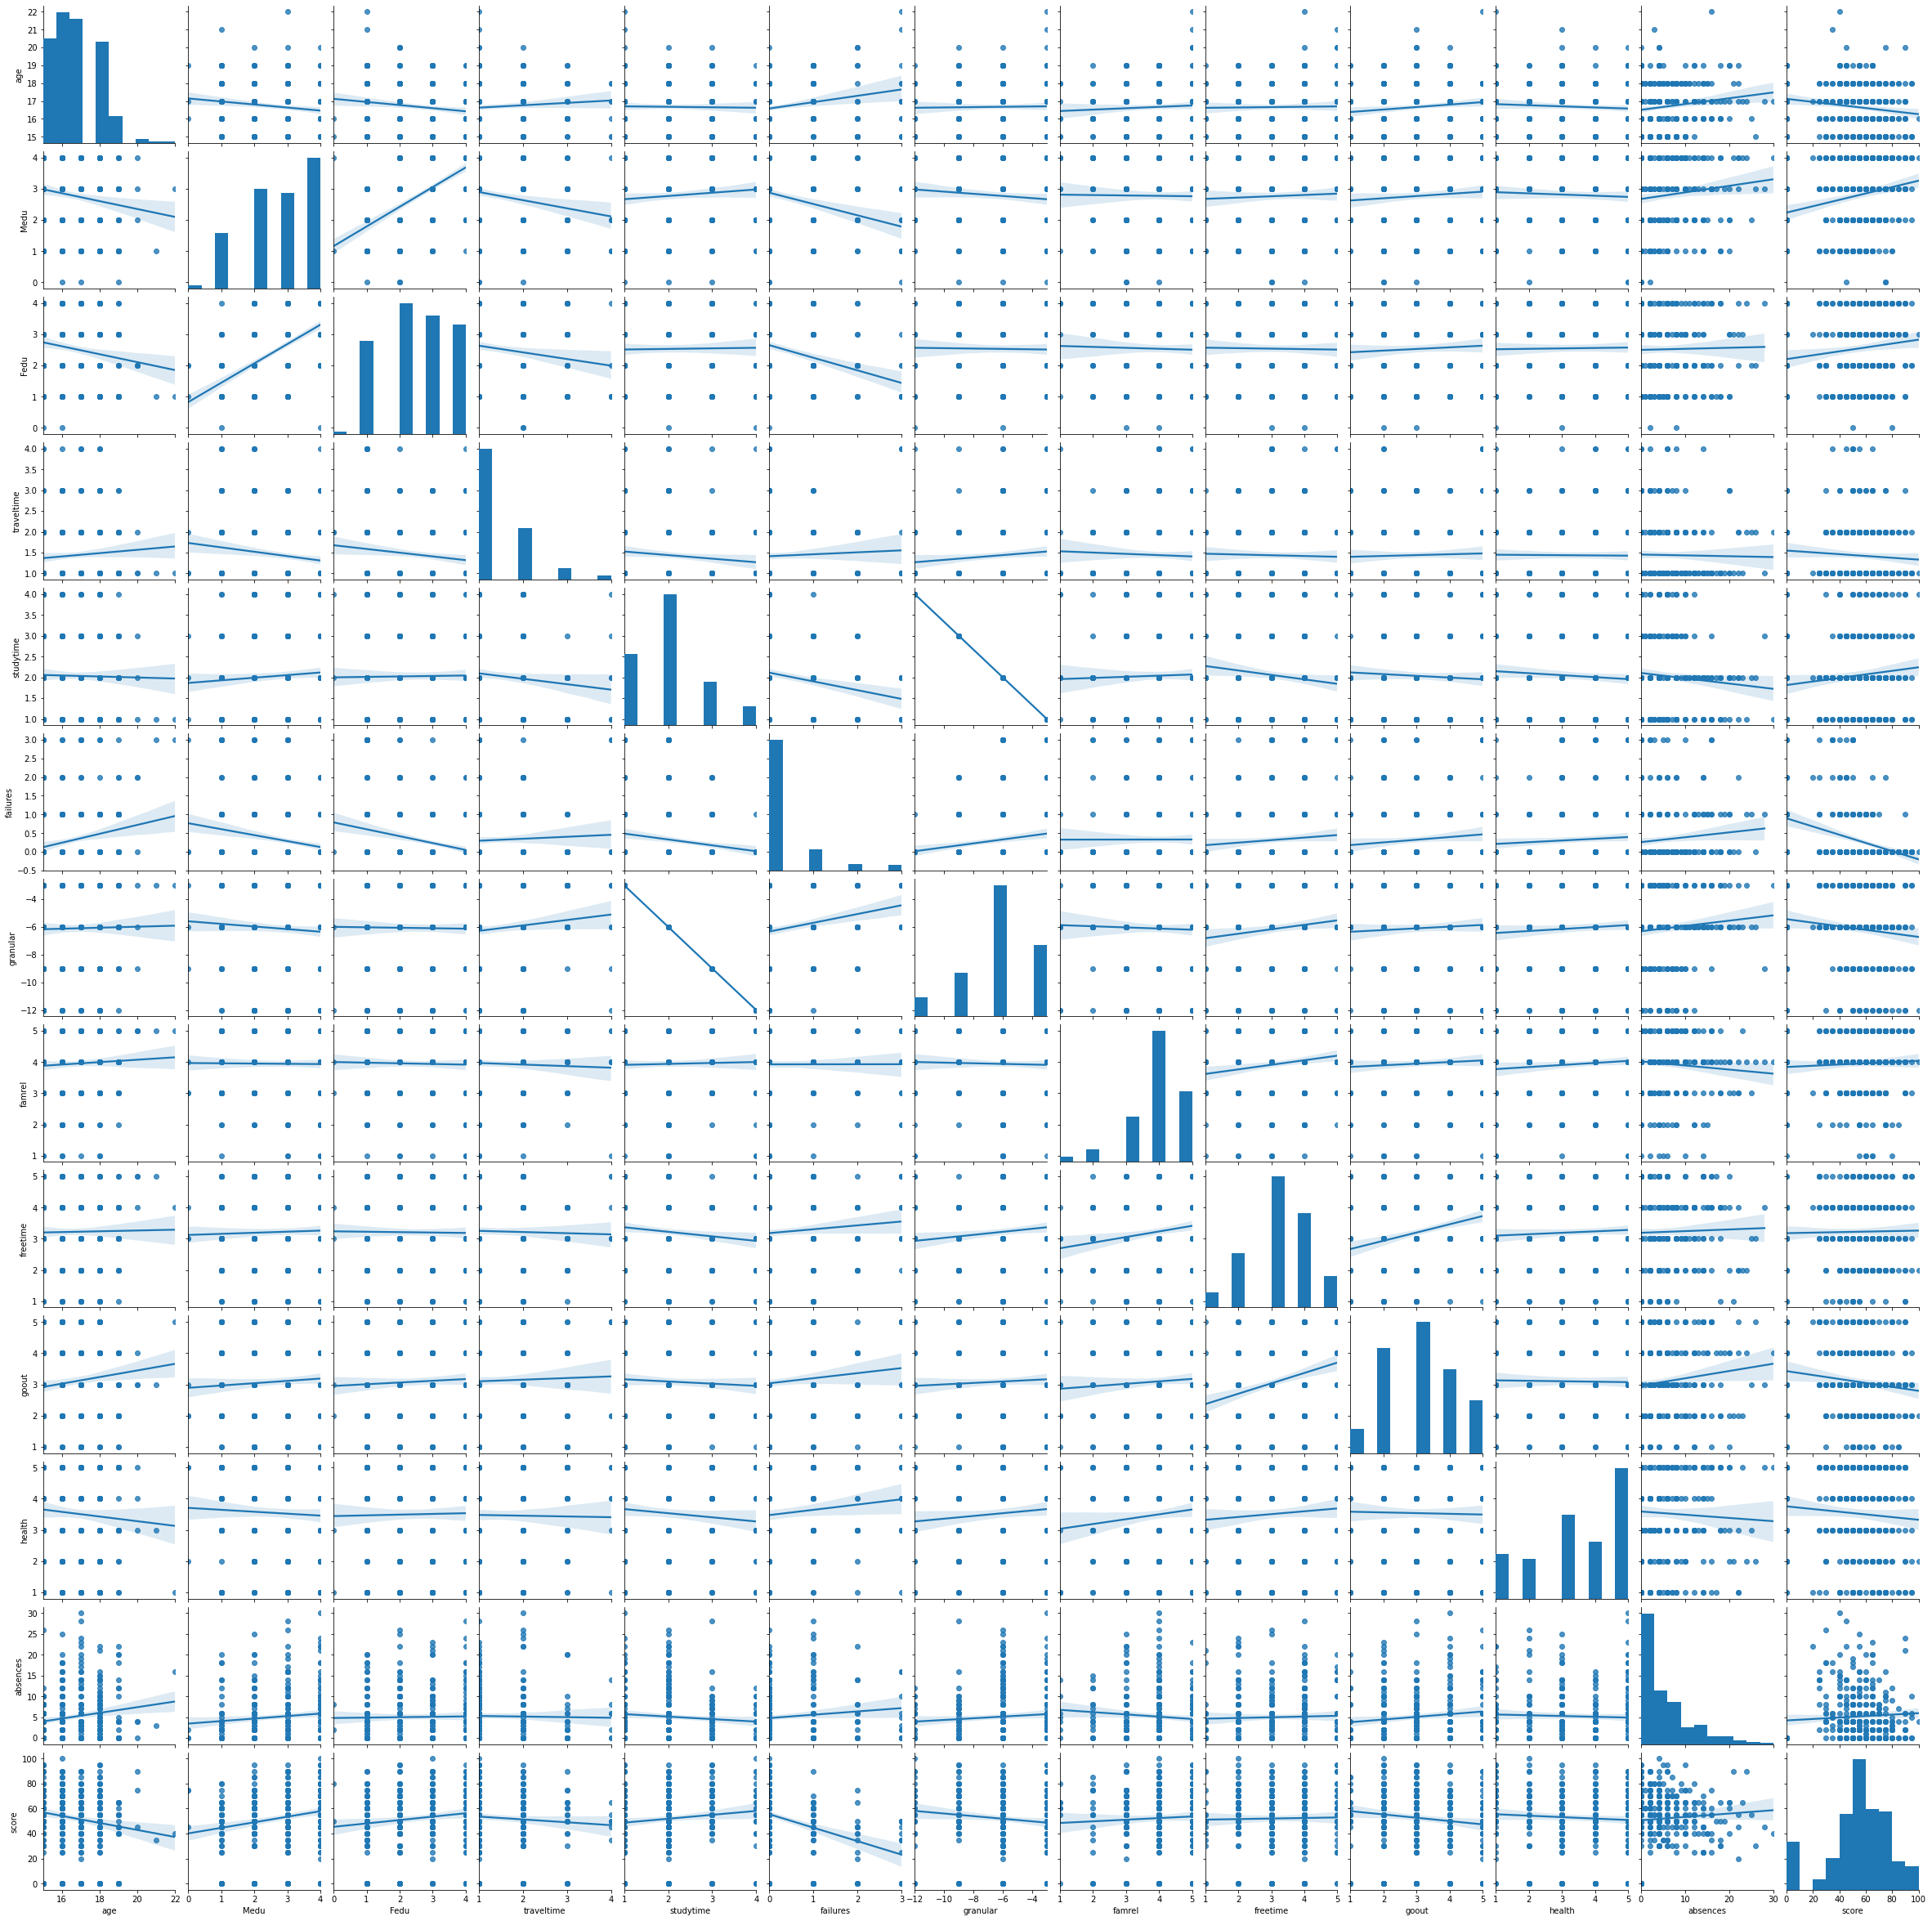

In [152]:
sns.pairplot(stud_math, kind='reg')

In [153]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.146736,-0.149146,0.073146,-0.018227,0.205919,0.018227,0.054733,0.016099,0.121115,-0.068103,0.149105,-0.155726
Medu,-0.146736,1.000000,0.625141,-0.165838,0.081032,-0.240319,-0.081032,-0.010320,0.038265,0.072320,-0.048331,0.112646,0.213349
Fedu,-0.149146,0.625141,1.000000,-0.138326,0.014384,-0.272767,-0.014384,-0.025032,-0.014180,0.053654,0.017734,0.017973,0.130357
traveltime,0.073146,-0.165838,-0.138326,1.000000,-0.105910,0.049738,0.105910,-0.039395,-0.026299,0.032629,-0.011724,-0.017095,-0.070559
studytime,-0.018227,0.081032,0.014384,-0.105910,1.000000,-0.181947,-1.000000,0.028963,-0.125066,-0.053831,-0.079180,-0.087431,0.115741
failures,0.205919,-0.240319,-0.272767,0.049738,-0.181947,1.000000,0.181947,0.001054,0.091608,0.107747,0.088013,0.101608,-0.344338
granular,0.018227,-0.081032,-0.014384,0.105910,-1.000000,0.181947,1.000000,-0.028963,0.125066,0.053831,0.079180,0.087431,-0.115741
famrel,0.054733,-0.010320,-0.025032,-0.039395,0.028963,0.001054,-0.028963,1.000000,0.162147,0.064076,0.100855,-0.084560,0.051106
freetime,0.016099,0.038265,-0.014180,-0.026299,-0.125066,0.091608,0.125066,0.162147,1.000000,0.296338,0.064315,0.030432,0.019026
goout,0.121115,0.072320,0.053654,0.032629,-0.053831,0.107747,0.053831,0.064076,0.296338,1.000000,-0.018026,0.122244,-0.129685


Корреляционный анализ показал, что параметры studytime и granular скоррелированны, поэтому удаляем из датасета столбец granular. 

In [154]:
stud_math.drop(['granular'], axis=1, inplace=True)

Из колонок, которые корелируют с итоговыми баллами по экзамену, выберем для построения модели наиболее корелирующие (с коэффициентом кореляции > 0.1). Это колонки age, Medu, Fedu, studytime, failures и goout. Исключим другие столбцы из рассмотрения.

Интересно, что время в пути до школы, отношения в семье, количество свободного времени, уровень здоровья и количество свободного времени после занятий практически не корелиют с результатами экзамена.

# Analysis of Nominative Variables

## Boxplots

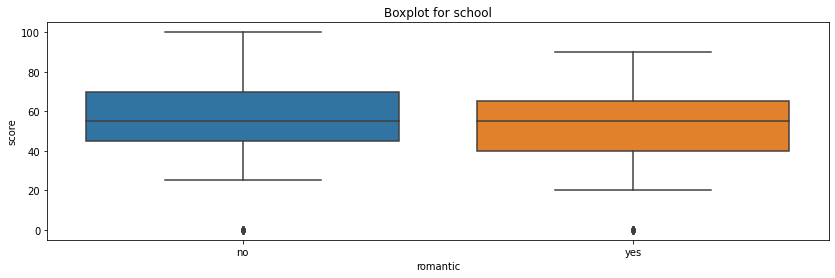

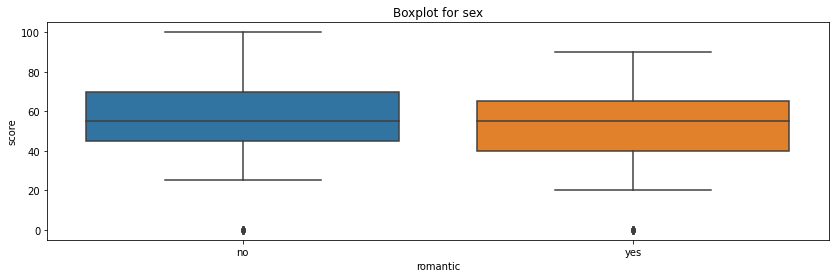

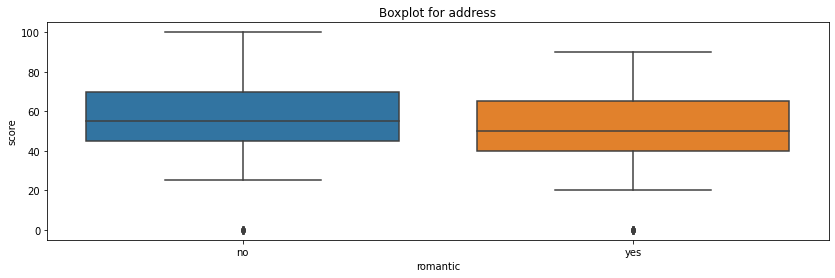

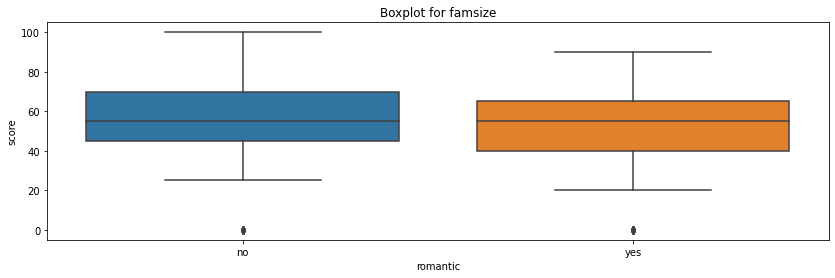

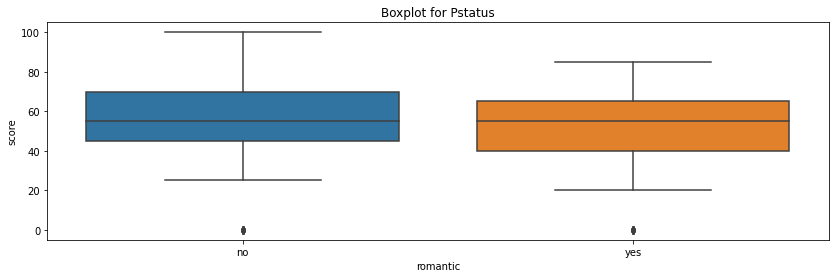

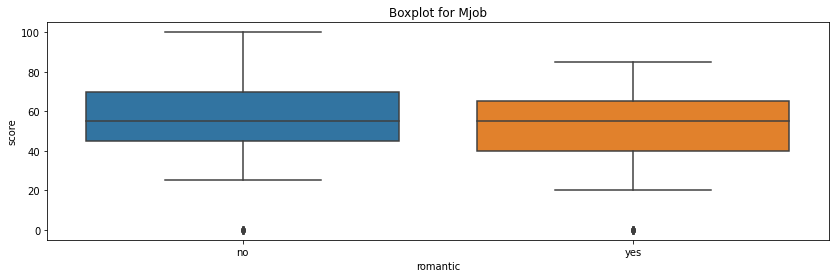

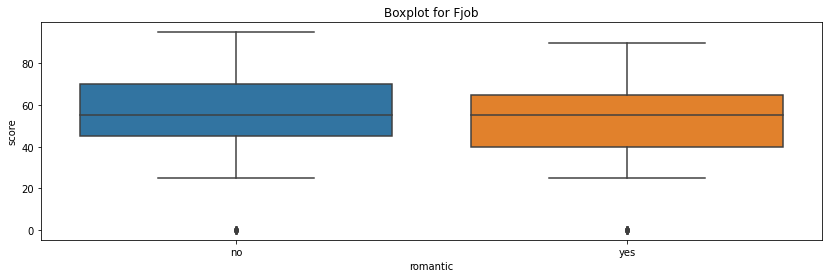

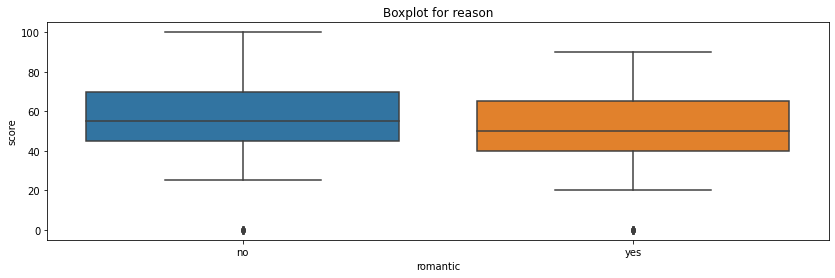

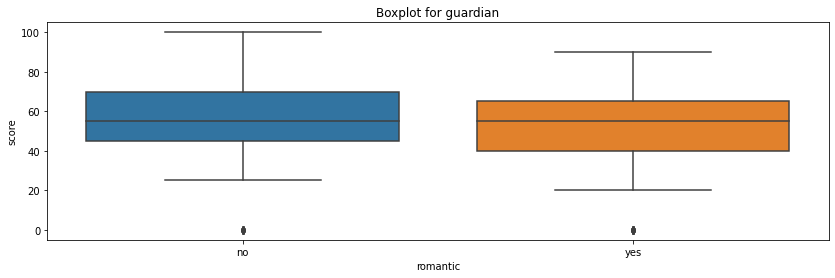

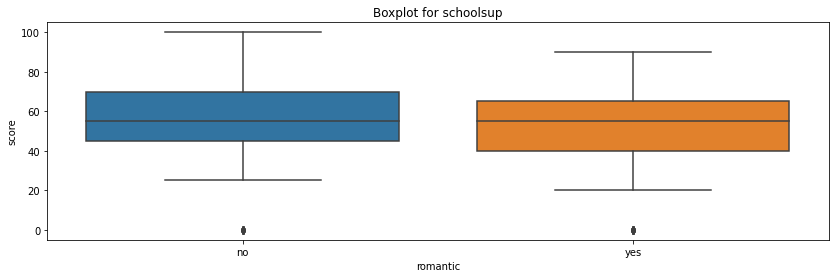

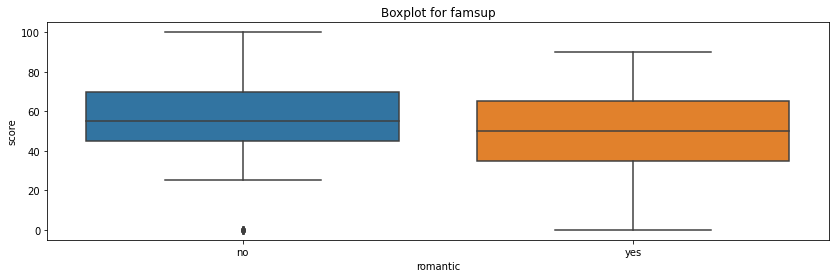

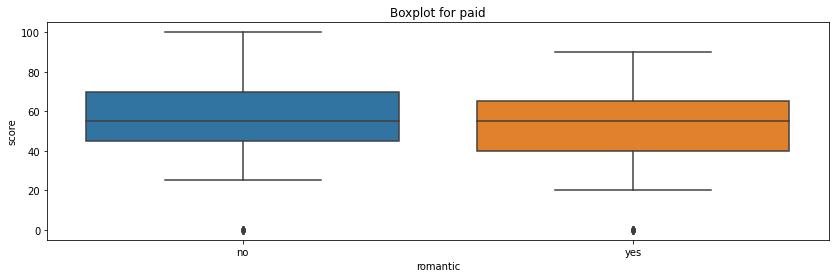

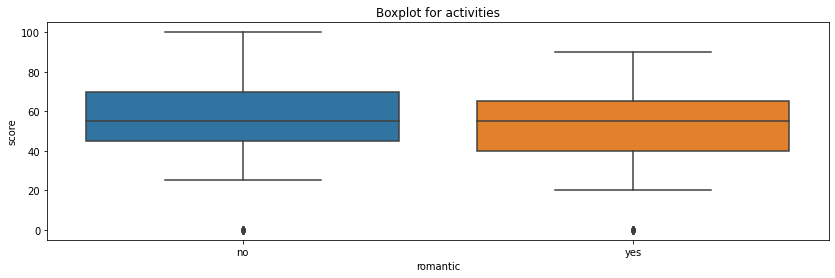

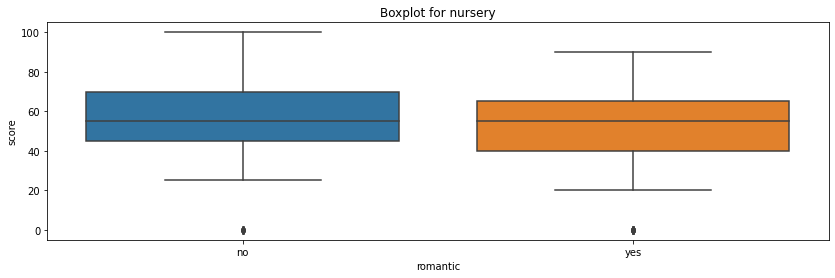

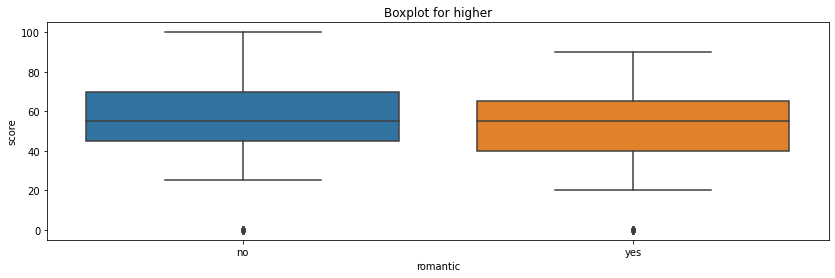

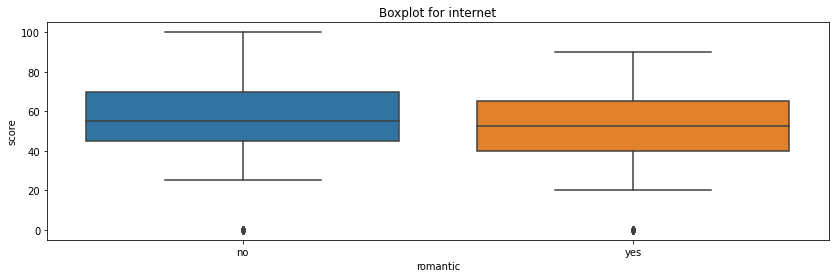

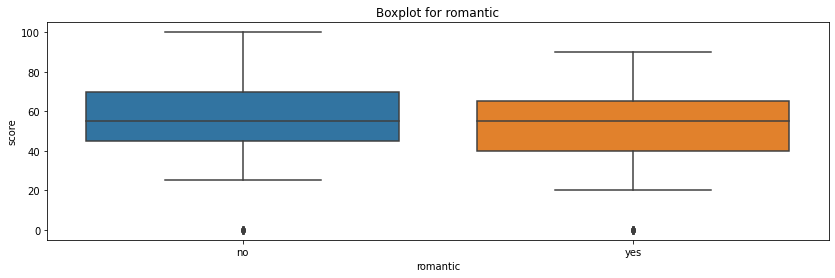

In [155]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Анализ построенных боксплотов по параметру score дали основание полагать, что на оценки учеников влияют параметры Mjob и Fjob. Это предположительная оценка. Протестируем гипотезу с помощью теста Стьюдента.

## Student's t-test

In [157]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Found statistically significant differences for the column address
Found statistically significant differences for the column Mjob
Found statistically significant differences for the column higher
Found statistically significant differences for the column romantic


Тест Стьюдента показал, что выявлены значительные аномалии в статистике по параметрам address, Mjob, higher, romantic. Будем их также использовать при построении будущей модели. 

Интересно, что образование матери влияет на итоговый балл по математике, а работа отца - нет.

# Data Set for Model

In [ ]:
stud_math_model = stud_math.loc[:, ['age', 'address', 'Medu', 'Fedu', 'Mjob', 'traveltime', 'studytime', 'failures',
                                    'higher', 'goout', 'romantic', 'score']]
stud_math_model.head()

Создаём новый датасет для построения модели. Включаем в него все ранее отобранные параметры.

# Conclusions

Проведён разведывательный анализ данных по выявлению закономерностей между успеваемостью учеников по математике и другими статистическими параметрами, собранными в первоначальном датасете.

При этом в данных достаточно немного пропущенных значений, что говорит об относительно чистых данных на входе. На данном этапе заполнить пропущенные значения не предоставляется возможным.

Также мы обнаружили выбросы данных в параметрах Fedu, famrel, absences и score. Заменили данные за пределами экстремальных значений с учётом здравого смысла на медианы. 

Такие параметры, как время в пути до школы, отношения в семье, количество свободного времени, уровень здоровья и количество свободного времени после занятий практически не корелиют с результатами экзамена.

Образование матери влияет на итоговый балл по математике, а работа отца - нет.

Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, address, Medu, Fedu, Mjob, traveltime, studytime, failures, higher, goout, romantic и score.
